In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [2]:
leads = pd.read_csv(r"C:\Users\pooja\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### STEP 1. DATA CLEANING AND PREPERATION

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [8]:
# Checking  the null values in each columns
leads.isnull().sum().sort_values(ascending= False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

As it is clearly seen there are a lot of columns which have high number of missing values. 
Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe,
let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [9]:
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Eliminating More than 30% missing value columns, which is more than 3000 missing values in the column.

In [10]:
#Dropping all the columns in which missing values are greater than 30%
for i in leads.columns:
    if leads[i].isnull().sum()>3000:
        leads.drop(i, axis=1, inplace=True)

In [11]:
leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

#### Catagorical attributes analysis:

In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [13]:
# Checking the value counts for country column
leads["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [14]:
# Since India is the most common occurance among the non missing values, we can impute all the missing values to India.

leads["Country"] = leads["Country"].replace(np.nan, "India")

In [15]:
leads["Country"].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

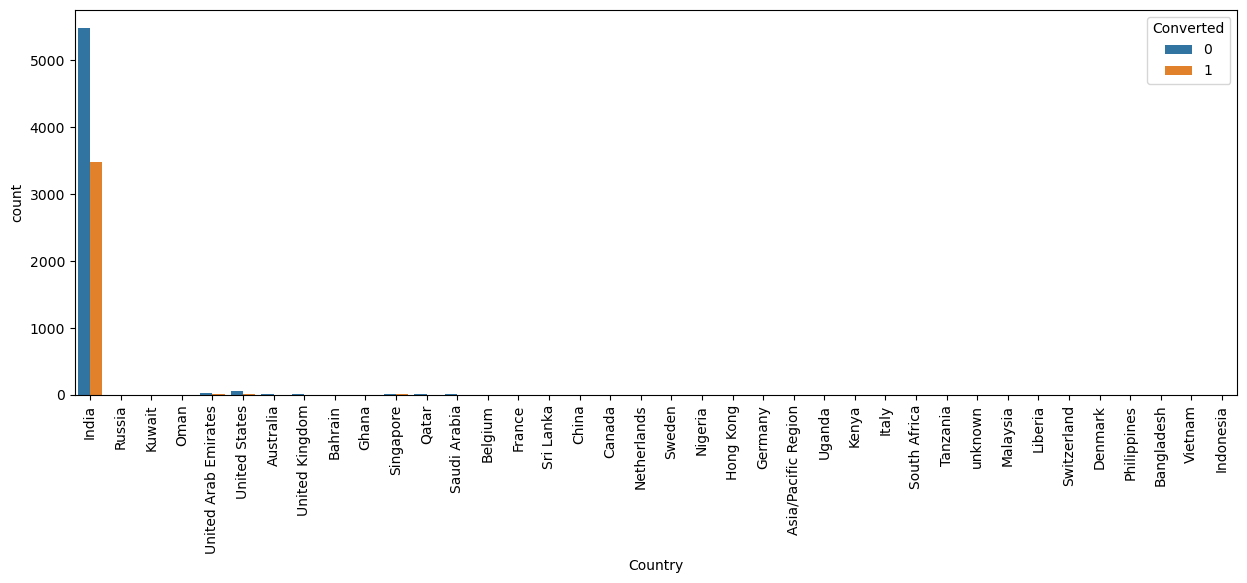

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x= "Country", hue ="Converted")
plt.xticks(rotation=90)
plt.show()

As we can see number of values are high for India, which is nearly 97% , So this column can be dropped.

In [17]:
leads["City"].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
cols_to_drop = ["Country"]

In [19]:
leads["City"]= leads["City"].replace(np.nan, "Mumbai")

In [20]:
leads["City"].value_counts(dropna=False)

Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

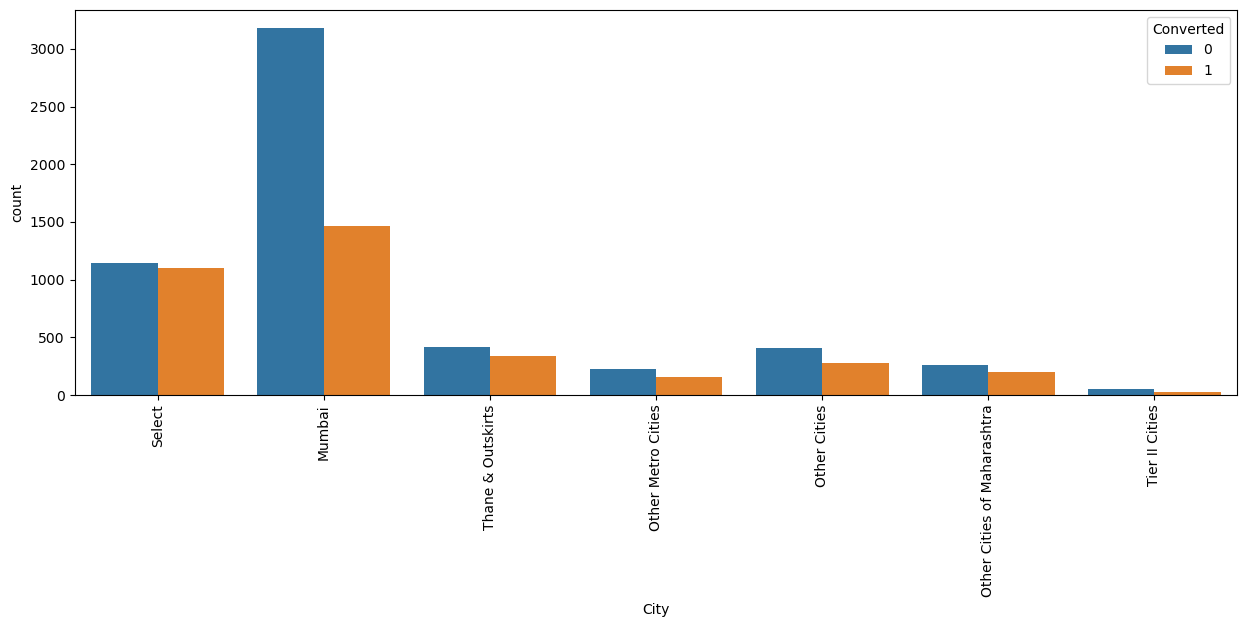

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x = "City", hue = "Converted")
plt.xticks(rotation=90)
plt.show()

In [22]:
leads["Specialization"].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
leads["Specialization"] = leads["Specialization"].replace(np.nan, "Not Specified")

In [24]:
leads["Specialization"].value_counts(dropna=False)

Select                               1942
Not Specified                        1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

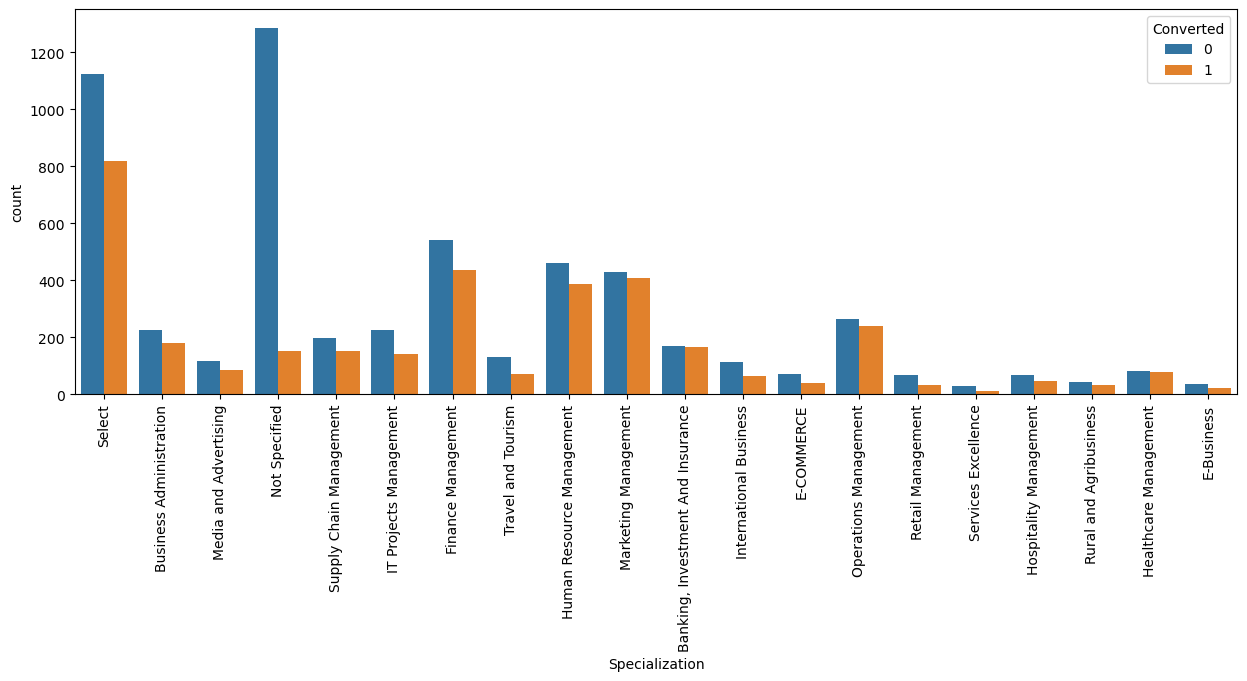

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x="Specialization", hue="Converted", data=leads)
plt.xticks(rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. 
So this is definitely a significant variable and should not be dropped.

In [26]:
leads["Specialization"] = leads["Specialization"].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'], 'Management_Specializations')  

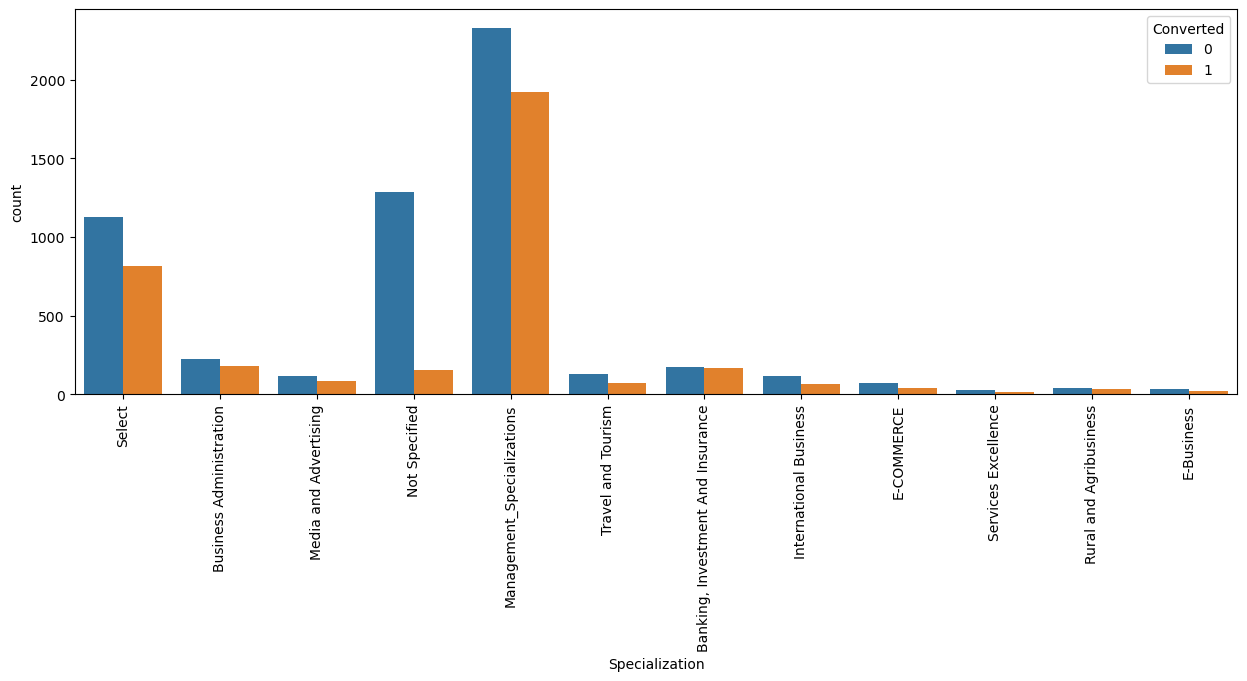

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x ="Specialization", data = leads, hue= "Converted")
plt.xticks(rotation=90)
plt.show()

In [28]:
leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
## As unemployeed has higher occurance , will impute nan values into unemployeed.
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan, "Unemployed")

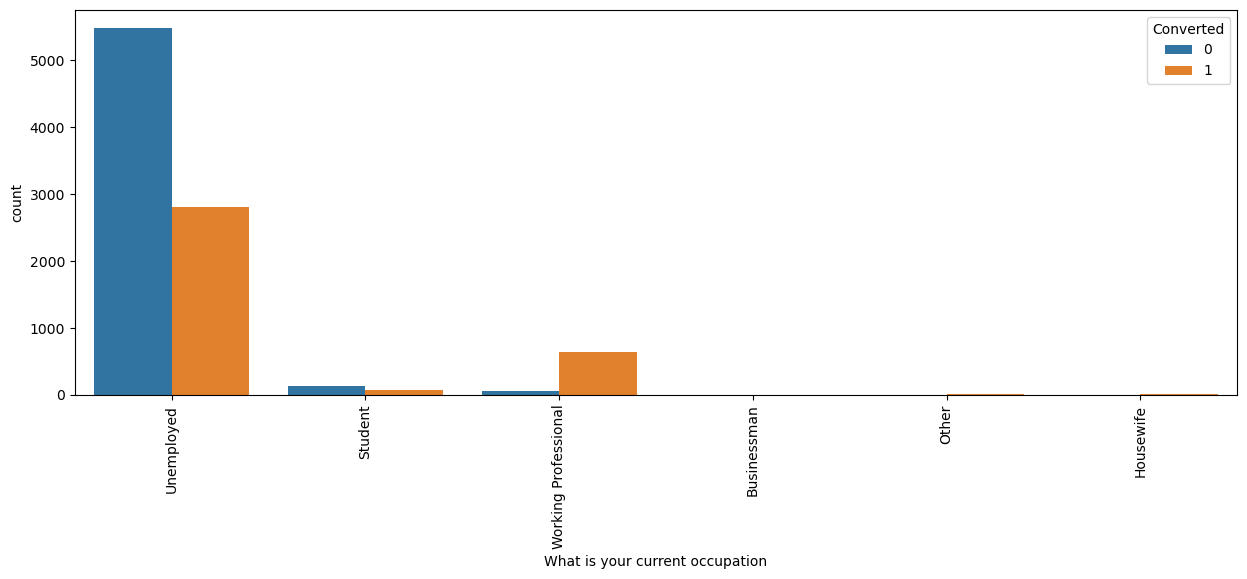

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x="What is your current occupation", hue= "Converted")
plt.xticks(rotation=90)
plt.show()

Working professional have higher chances of going for course

In [31]:
leads["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
# Repalcing nan values with better career prospects
leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prosoects")

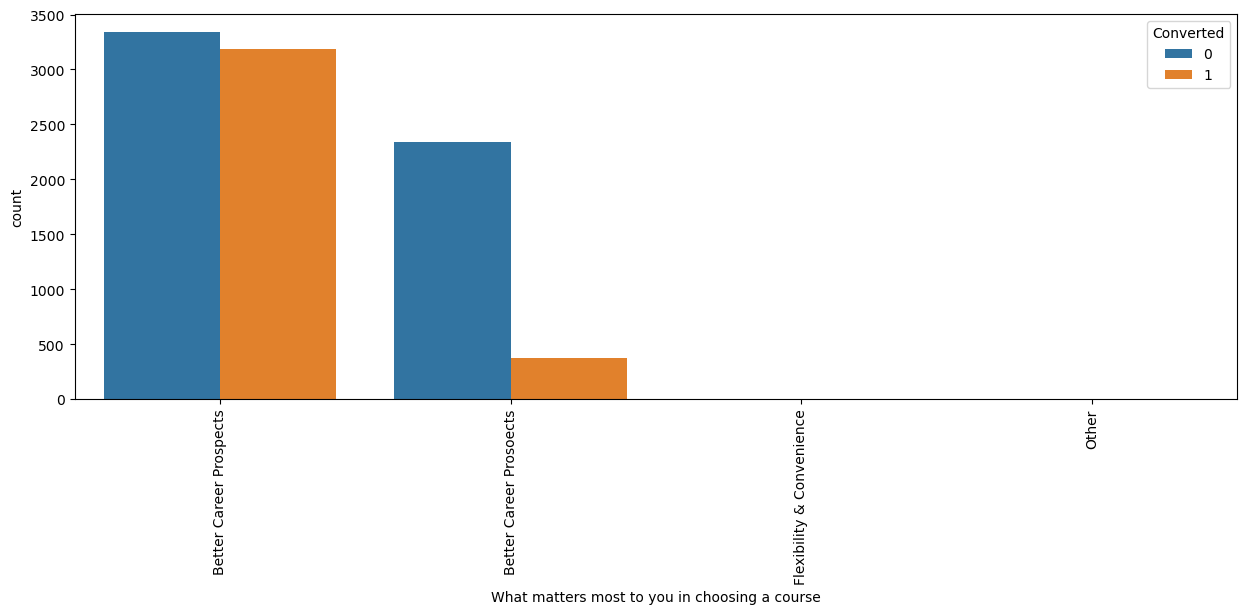

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x= "What matters most to you in choosing a course", hue= "Converted")
plt.xticks(rotation=90)
plt.show()

In [34]:
#creating a list of columns to be droppped

cols_to_drop.append("What matters most to you in choosing a course")
cols_to_drop


['Country', 'What matters most to you in choosing a course']

In [35]:
leads["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
#replacing Nan Values and combining low frequency values to others
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

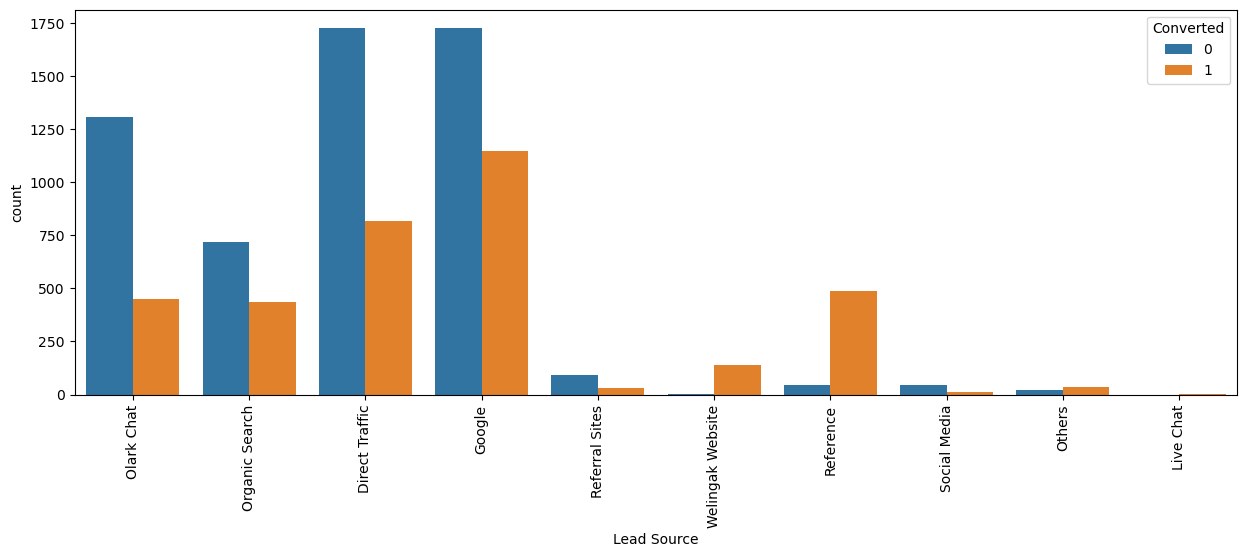

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x= "Lead Source", data= leads, hue= "Converted")
plt.xticks(rotation=90)
plt.show()

Inference
Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, 
and google leads and generate more leads from reference and welingak website.

In [38]:
leads["Last Activity"].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

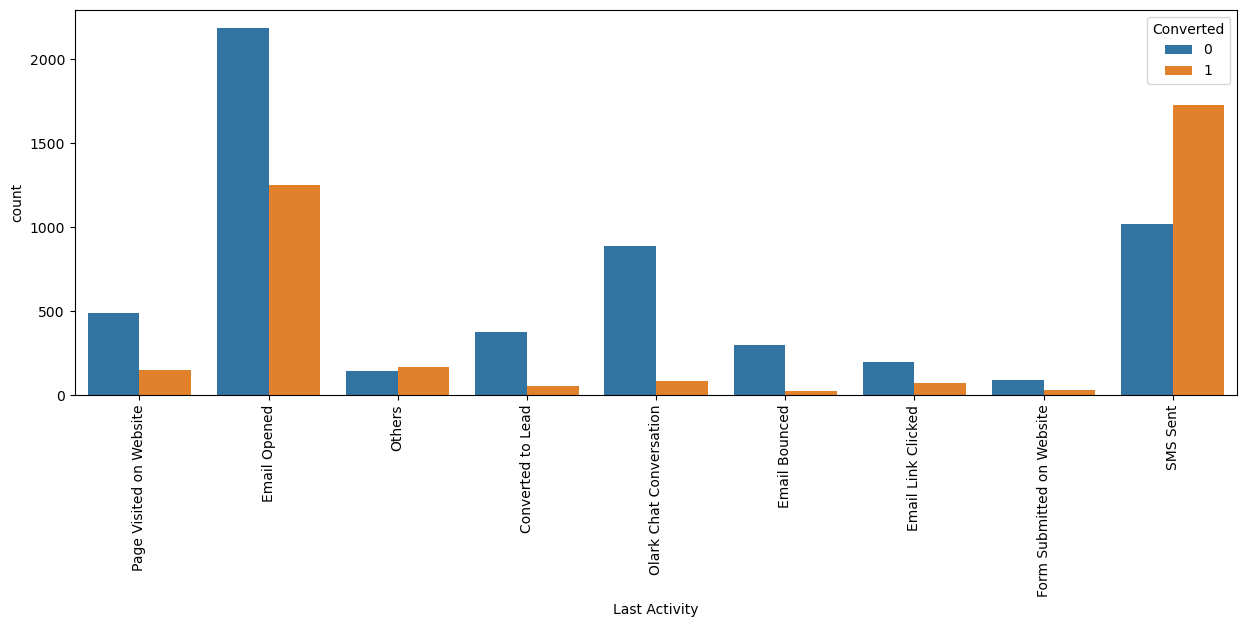

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x= "Last Activity", hue = "Converted")
plt.xticks(rotation=90)
plt.show()

In [41]:
leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
How did you hear about X Education               2207
TotalVisits                                       137
Page Views Per Visit                              137
Lead Origin                                         0
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Search                                              0
Magazine                                            0
Lead Source                 

In [42]:
leads["Lead Profile"].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

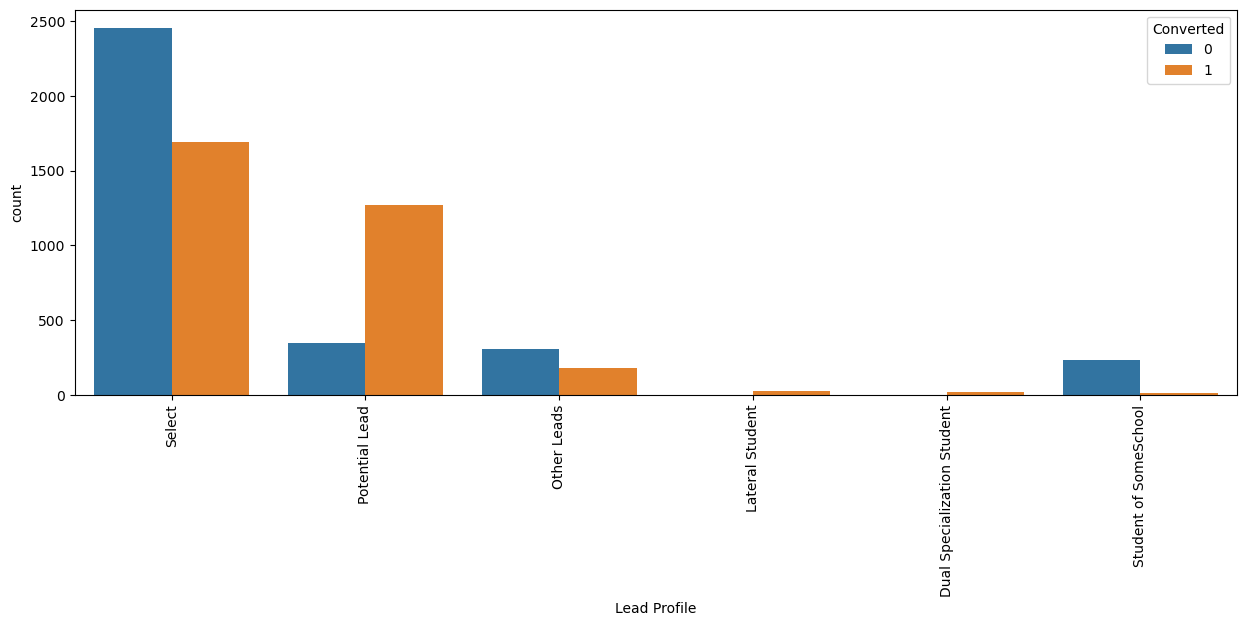

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x= "Lead Profile", hue = "Converted")
plt.xticks(rotation=90)
plt.show()

In [44]:
leads["How did you hear about X Education"].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

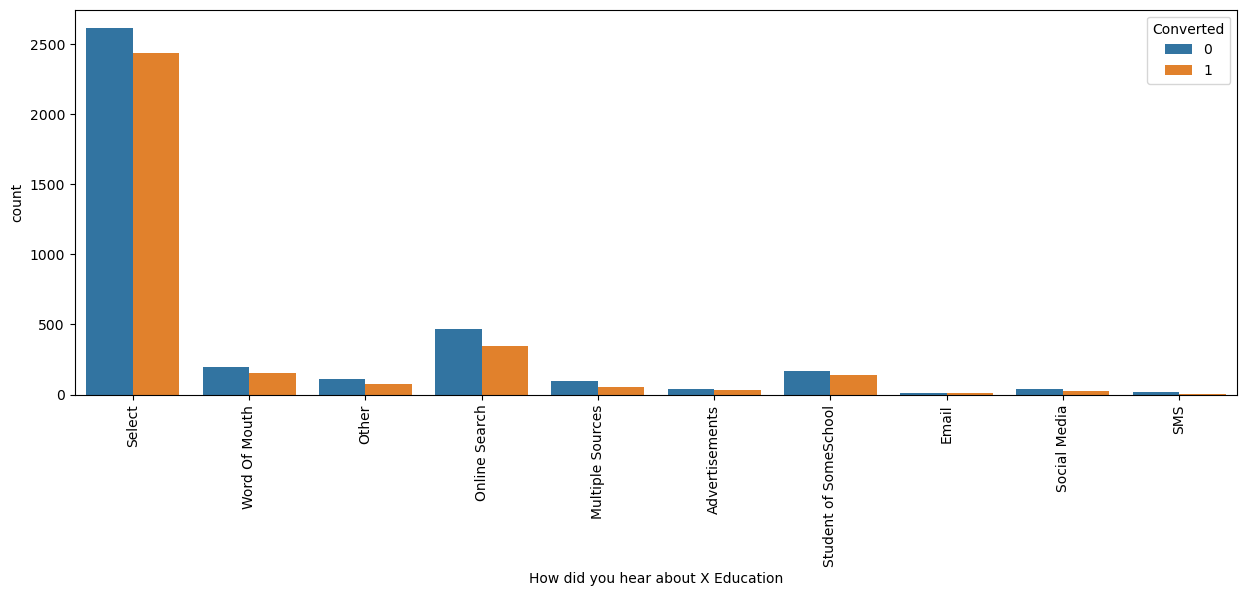

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x= "How did you hear about X Education", hue = "Converted")
plt.xticks(rotation=90)
plt.show()

In [46]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [47]:
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [48]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [49]:
#Checking for null values
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [50]:
leads["Lead Origin"].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

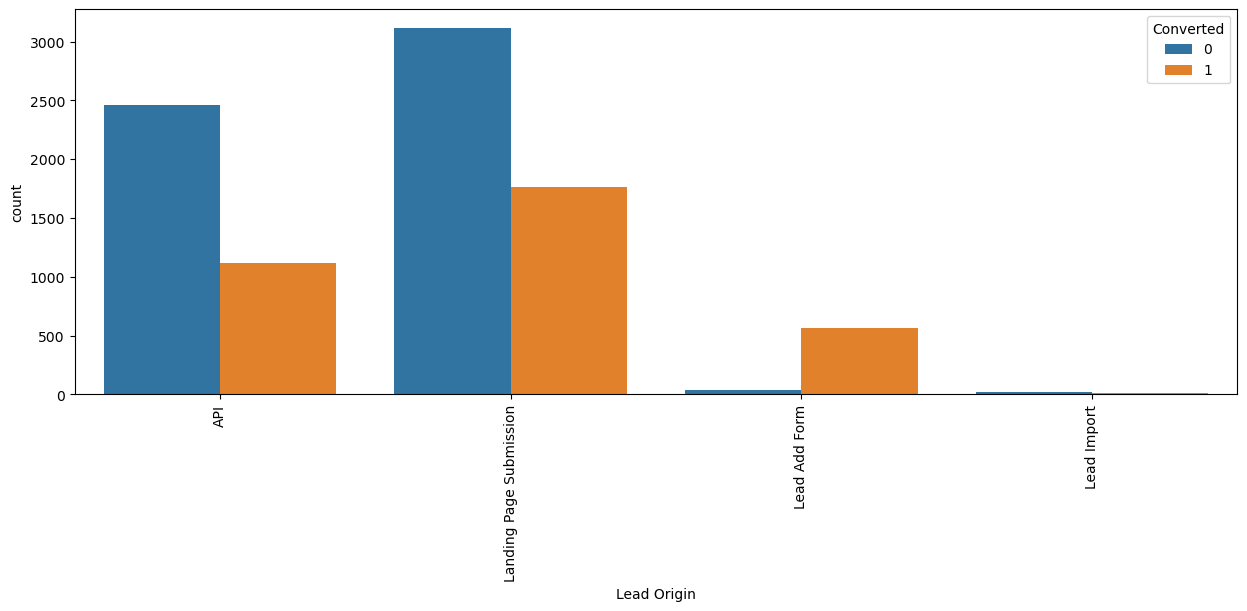

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(data=leads, x= "Lead Origin", hue="Converted")
plt.xticks(rotation=90)
plt.show()

Inference

API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, 
we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [52]:
# Checking value counts for Do Not Call.
leads["Do Not Call"].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [53]:
# Checking value counts for Do Not Email
leads["Do Not Email"].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

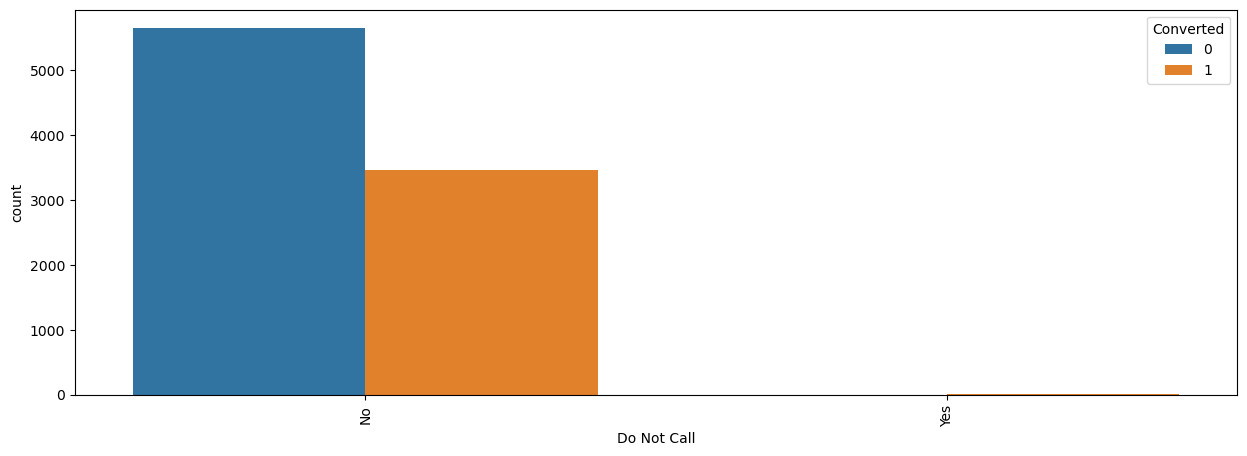

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(data=leads, x="Do Not Call", hue= "Converted")
plt.xticks(rotation=90)
plt.show()

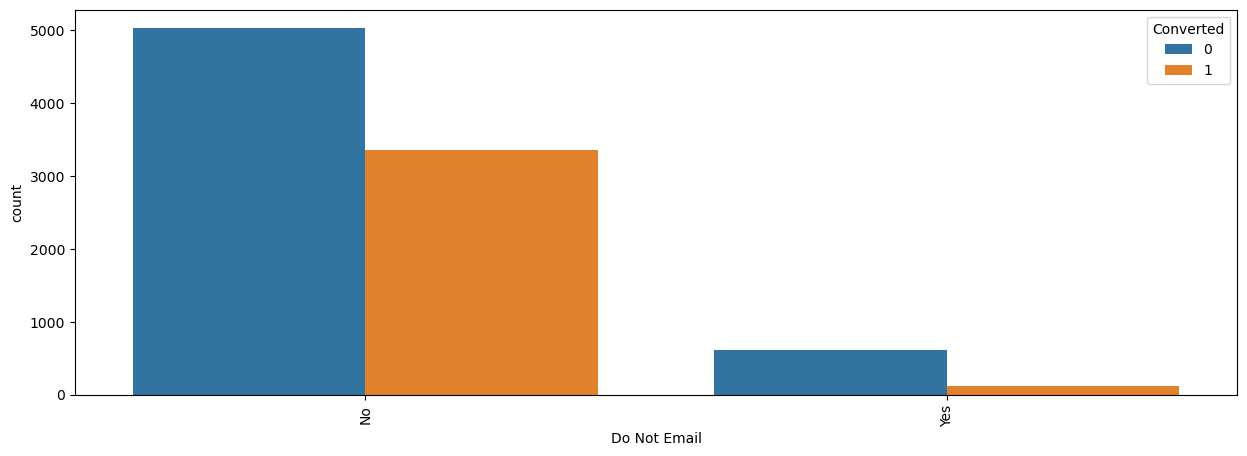

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data=leads, x="Do Not Email", hue= "Converted")
plt.xticks(rotation=90)
plt.show()

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [56]:
cols_to_drop.append("Do Not Call")
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [58]:
# Imbalanced variables can be dropped
leads["Search"].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [59]:
leads["Magazine"].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [60]:
leads["Newspaper Article"].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
leads["X Education Forums"].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [62]:
leads["Newspaper"].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [63]:
leads["Digital Advertisement"].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [64]:
leads["Through Recommendations"].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [65]:
leads["Receive More Updates About Our Courses"].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [66]:
leads["Update me on Supply Chain Content"].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [67]:
leads["Get updates on DM Content"].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [68]:
leads["I agree to pay the amount through cheque"].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [69]:
leads["A free copy of Mastering The Interview"].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [70]:
leads["Last Notable Activity"].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [71]:
# from last notable activity clubbling all the low frequency values to others

leads["Last Notable Activity"] = leads["Last Notable Activity"].replace(["Email Marked Spam", "Approached upfront", "Resubscribed to emails",
                                                                        "View in browser link Clicked", "Form Submitted on Website","Email Received"], "others")

In [72]:
leads["Last Notable Activity"].value_counts(dropna=False)

Modified                    3270
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
others                         7
Name: Last Notable Activity, dtype: int64

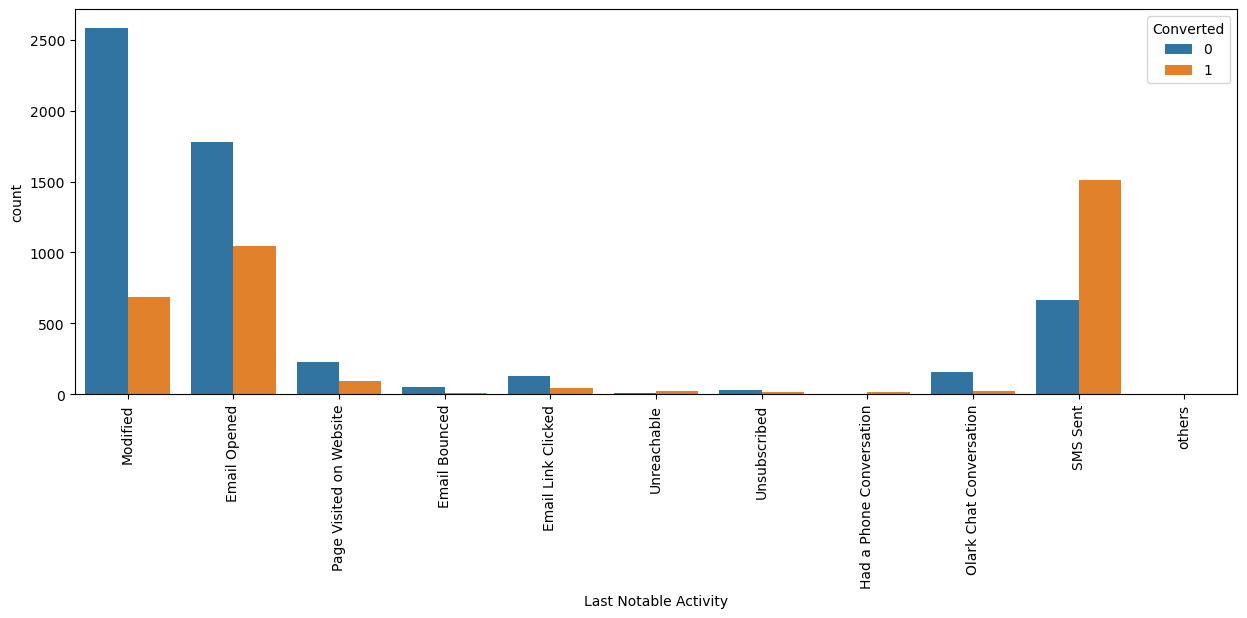

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(data= leads, x= "Last Notable Activity", hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [74]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [75]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [76]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

### Numerical attributes analysis

In [77]:
#Check the % of Data that has Converted Values = 1:

Converted = (leads['Converted'].sum() / len(leads['Converted'])) * 100
Converted

38.02043282434362

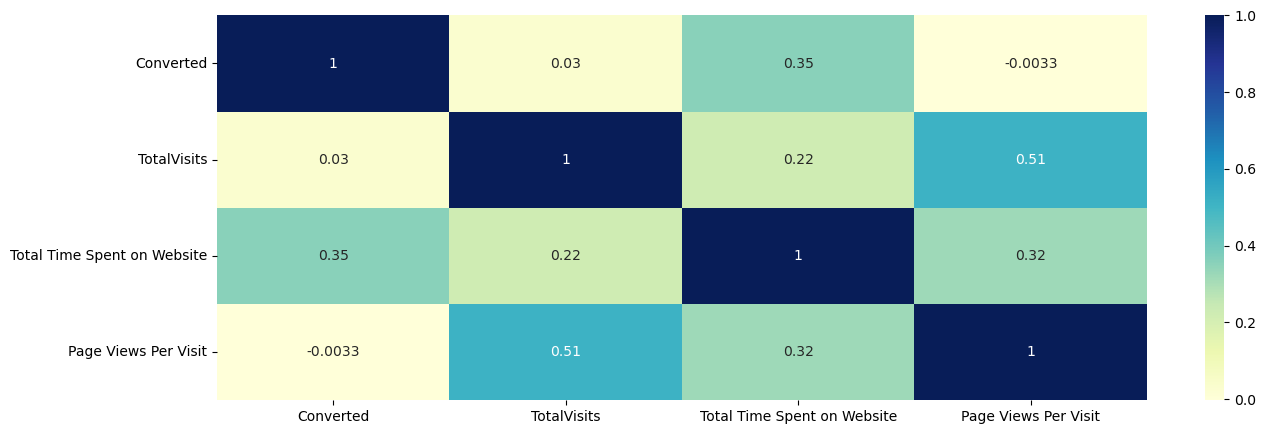

In [78]:
#Checking correlations of numeric values

plt.figure(figsize=(15,5))
sns.heatmap(leads.corr(), cmap= "YlGnBu", annot= True)
plt.show()


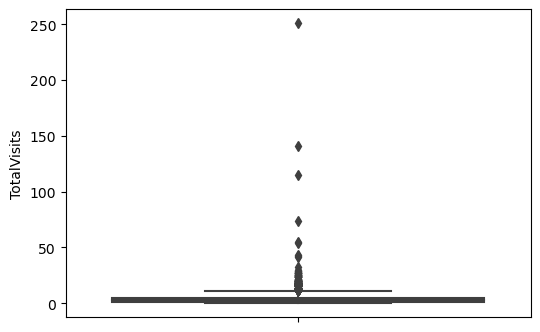

In [79]:
#  Tottal visit
# visualising the total spread

plt.figure(figsize=(6,4))
sns.boxplot( y= leads["TotalVisits"])
plt.show()

We can see presence of outliers here.

In [80]:
# Checking for percentile values 
leads["TotalVisits"].describe(percentiles =[0.05, .25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

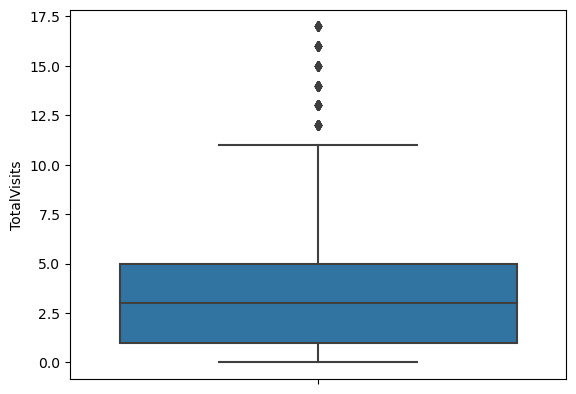

In [81]:
# Outiler Treatment: Remove top and bottom 1% of the column Outlier Values
Q3 = leads.TotalVisits.quantile(0.99)

leads = leads[(leads.TotalVisits <= Q3)]

Q1 = leads.TotalVisits.quantile(0.01)

leads = leads[(leads.TotalVisits >= Q1)]

sns.boxplot(y= leads["TotalVisits"])

plt.show()


In [82]:
leads.shape

(9020, 13)

In [83]:
leads["Total Time Spent on Website"].describe(percentiles= [0.05, 0.5,0.25, 0.75, 0.90,0.95, 0.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

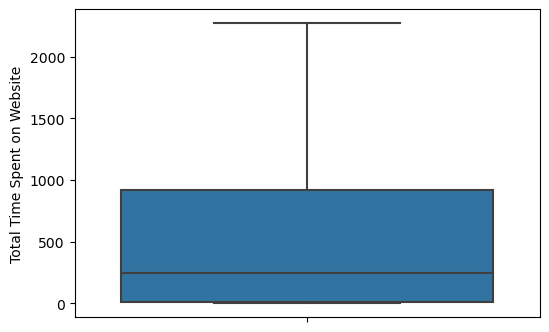

In [84]:
plt.figure(figsize= (6,4))
sns.boxplot(y= leads["Total Time Spent on Website"])
plt.show()


Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [85]:
leads["Page Views Per Visit"].describe(percentiles= [0.05, 0.25, 0.50, 0.75, 0.90, .95, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

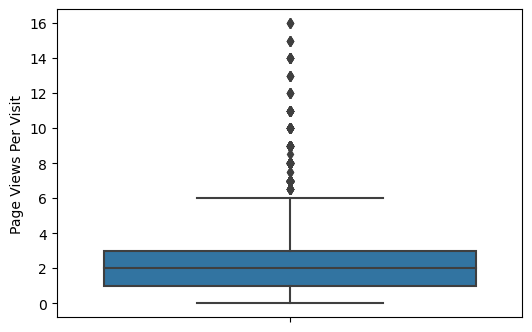

In [86]:
plt.figure(figsize= (6,4))
sns.boxplot(y= leads["Page Views Per Visit"])
plt.show()

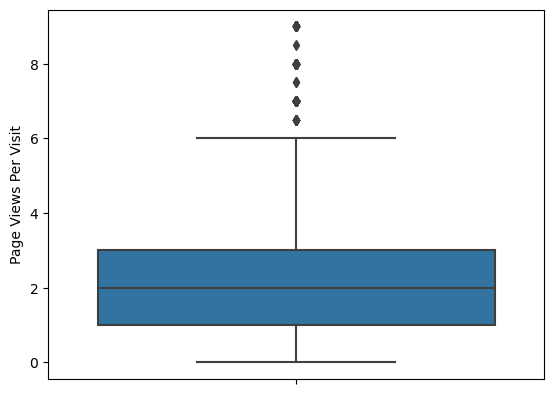

In [87]:
# Treating the outliers
Q3 = leads["Page Views Per Visit"].quantile(0.99)

leads = leads[leads["Page Views Per Visit"] <=Q3]

Q1= leads["Page Views Per Visit"].quantile(0.01)

leads = leads[leads["Page Views Per Visit"] >=Q1]

sns.boxplot(y =leads["Page Views Per Visit"])

plt.show()

In [88]:
leads.shape

(8953, 13)

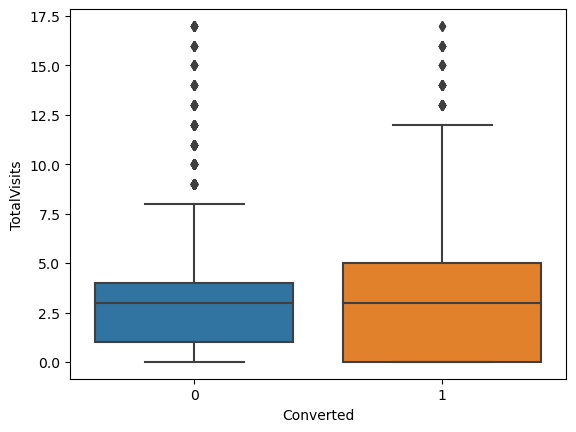

In [89]:
# Checking spread  of  "Total Visits" Vs "Converted"
sns.boxplot(data=leads, x= "Converted", y= "TotalVisits")
plt.show()

Inference

Median for converted and not converted leads are the close.
Nothng conclusive can be said on the basis of Total Visits

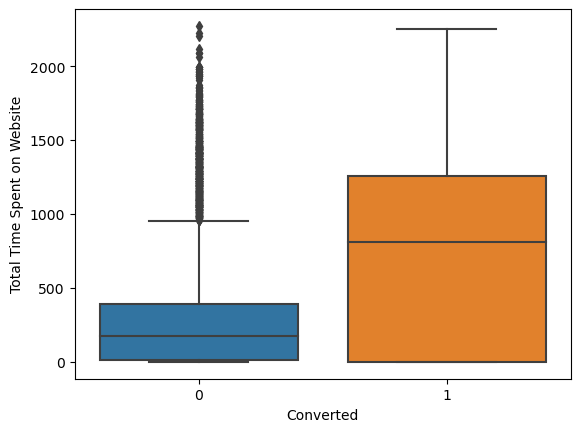

In [90]:
sns.boxplot(data= leads, x= "Converted", y= "Total Time Spent on Website")
plt.show()

Inference

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

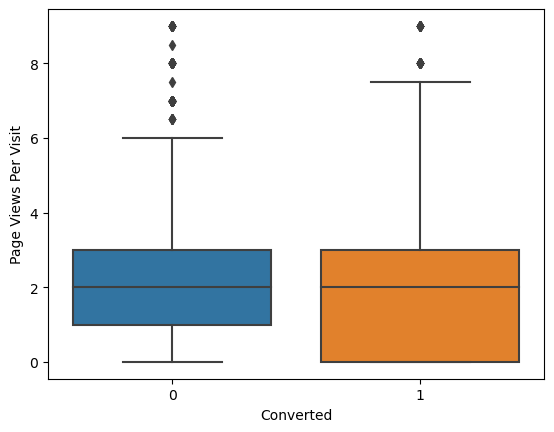

In [91]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inference

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

In [92]:
# Checking missing values
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

In [93]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


## Dummy Variable Creation:

The next step is to dealing with the categorical variables present in the dataset. 
So first take a look at which variables are actually categorical variables

In [94]:
leads.loc[:, leads.dtypes=="object"].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
leads["Lead Source"].value_counts()

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64

In [96]:
# Getting dummy varivles for categorical variables using pd.get_dummies

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
        'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

leads = pd.concat([leads, dummy], axis=1)

In [97]:
dummy.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'C

In [98]:
# In specialisation column has not specified column which is not usefull, can be dropped.
dummy1  = pd.get_dummies(leads["Specialization"], prefix= "Specialization")
dummy1 = dummy1.drop(["Specialization_Not Specified"], axis=1)
leads = pd.concat([leads, dummy1], axis=1)

In [99]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity', "City"], 1)

In [100]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Train & Test Split and Logistic Modelling

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
y = leads["Converted"]

y.head()

X= leads.drop("Converted", axis=1)

In [103]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [104]:
# Splitting the data into train and test test

X_train, X_test,y_train, y_test = train_test_split(X, y , train_size=0.7, test_size= 0.3, random_state= 100)

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   Lead Source_Google                                    6267 non-null   uint8  
 7   Lead Source_Live Chat                                 6267 non-null   uint8  
 8   Lead Source_Olark Chat                                6

#### Scaling

In [106]:
# Scaling the numerical data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism
9196,0.668862,1.848117,1.455819,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Model Building using stats model and RFE

In [107]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [108]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select =15)   # 15 VARIABLE OUTPUT
rfe = rfe.fit(X_train, y_train)

In [109]:
# Lets look at the features selected by the mmodel
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Social Media', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 39),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', False, 19),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 34),
 ('Last Activity_SMS 

In [110]:
# List of RFE supported columns
col = X_train.columns[rfe.support_]

In [111]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [112]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Select', 'City_Thane & Outskirts', 'City_Tier II Cities',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
     

### Model 1

In [113]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.8
Date:                Thu, 11 Apr 2024   Deviance:                       5245.7
Time:                        19:46:16   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0366      0.086    -12.118      0.000      -1.204      -0.869
Total Time Spent on Website                              1.0980      0.040     27.444      0.000       1.020       1.176
Lead Origin_Landing Page Submission                     -0.3185      0.089     -3.572      0.000      -0.493      -0.144
Lead Origin_Lead Add Form                                4.0809      0.253     16.123      0.000       3.585       4.577
Lead Source_Olark Chat                                   0.8668      0.116      7.460      0.000       0.639       1.095
Lead Source_Welingak Website                             2.2948      1.039      2.208      0.027       0.258       4.332
Do Not Email_Yes                                        -1.4179      0.179     -7.939      0.000      -1.768      -1.068
Last Activity_Others                                     1.0504      0.249      4.219      0.000       0.562       1.538
Last Activity_SMS Sent                                   1.3645      0.075     18.163      0.000       1.217       1.512
What is your current occupation_Housewife               23.3764   1.77e+04      0.001      0.999   -3.47e+04    3.47e+04
What is your current occupation_Working Professional     2.8017      0.198     14.118      0.000       2.413       3.191
Last Notable Activity_Had a Phone Conversation          22.0717   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
Last Notable Activity_Modified                          -1.0114      0.078    -12.976      0.000      -1.164      -0.859
Last Notable Activity_Olark Chat Conversation           -1.9668      0.379     -5.188      0.000      -2.710      -1.224
Specialization_Banking, Investment And Insurance         0.4231      0.185      2.282      0.022       0.060       0.786
Specialization_Rural and Agribusiness                    0.6586      0.373      1.767      0.077      -0.072       1.389
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. 
We will need to take care of them. But first, let's also look at the VIFs.

In [114]:
col =col.drop("What is your current occupation_Housewife",1)

### Model 2

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.9
Date:                Thu, 11 Apr 2024   Deviance:                       5255.8
Time:                        19:46:16   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3874
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0332      0.085    -12.095      0.000      -1.201      -0.866
Total Time Spent on Website                              1.0965      0.040     27.441      0.000       1.018       1.175
Lead Origin_Landing Page Submission                     -0.3154      0.089     -3.542      0.000      -0.490      -0.141
Lead Origin_Lead Add Form                                4.0961      0.253     16.199      0.000       3.600       4.592
Lead Source_Olark Chat                                   0.8631      0.116      7.434      0.000       0.636       1.091
Lead Source_Welingak Website                             2.2761      1.039      2.190      0.029       0.239       4.313
Do Not Email_Yes                                        -1.4205      0.179     -7.955      0.000      -1.771      -1.071
Last Activity_Others                                     1.0454      0.249      4.200      0.000       0.558       1.533
Last Activity_SMS Sent                                   1.3596      0.075     18.112      0.000       1.212       1.507
What is your current occupation_Working Professional     2.7968      0.198     14.099      0.000       2.408       3.186
Last Notable Activity_Had a Phone Conversation          22.0730    1.5e+04      0.001      0.999   -2.95e+04    2.95e+04
Last Notable Activity_Modified                          -1.0092      0.078    -12.966      0.000      -1.162      -0.857
Last Notable Activity_Olark Chat Conversation           -1.9677      0.379     -5.191      0.000      -2.711      -1.225
Specialization_Banking, Investment And Insurance         0.4187      0.185      2.260      0.024       0.056       0.782
Specialization_Rural and Agribusiness                    0.6540      0.373      1.755      0.079      -0.076       1.384
========================================================================================================================
"""

In [116]:
col = col.drop("Last Notable Activity_Had a Phone Conversation",1)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.69
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.45
9,Last Notable Activity_Modified,1.45
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.29
8,What is your current occupation_Working Professional,1.17
5,Do Not Email_Yes,1.15
6,Last Activity_Others,1.06


### Model 3

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.7
Date:                Thu, 11 Apr 2024   Deviance:                       5263.3
Time:                        19:46:16   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0290      0.085    -12.060      0.000      -1.196      -0.862
Total Time Spent on Website                              1.0958      0.040     27.444      0.000       1.018       1.174
Lead Origin_Landing Page Submission                     -0.3180      0.089     -3.575      0.000      -0.492      -0.144
Lead Origin_Lead Add Form                                4.0915      0.253     16.179      0.000       3.596       4.587
Lead Source_Olark Chat                                   0.8593      0.116      7.406      0.000       0.632       1.087
Lead Source_Welingak Website                             2.2821      1.039      2.196      0.028       0.245       4.319
Do Not Email_Yes                                        -1.4466      0.179     -8.091      0.000      -1.797      -1.096
Last Activity_Others                                     1.1988      0.237      5.065      0.000       0.735       1.663
Last Activity_SMS Sent                                   1.3592      0.075     18.103      0.000       1.212       1.506
What is your current occupation_Working Professional     2.7945      0.198     14.083      0.000       2.406       3.183
Last Notable Activity_Modified                          -1.0161      0.078    -13.062      0.000      -1.169      -0.864
Last Notable Activity_Olark Chat Conversation           -1.9684      0.379     -5.194      0.000      -2.711      -1.226
Specialization_Banking, Investment And Insurance         0.4567      0.184      2.485      0.013       0.097       0.817
Specialization_Rural and Agribusiness                    0.6473      0.372      1.739      0.082      -0.082       1.377
========================================================================================================================
"""

In [120]:
col = col.drop("Lead Source_Welingak Website", 1)

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.69
6,Last Activity_SMS Sent,1.45
8,Last Notable Activity_Modified,1.45
3,Lead Source_Olark Chat,1.44
0,Total Time Spent on Website,1.29
2,Lead Origin_Lead Add Form,1.25
4,Do Not Email_Yes,1.15
7,What is your current occupation_Working Professional,1.15
5,Last Activity_Others,1.06
9,Last Notable Activity_Olark Chat Conversation,1.06


#### model 4

In [122]:
X_train_sm= sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.3
Date:                Thu, 11 Apr 2024   Deviance:                       5272.6
Time:                        19:46:17   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3858
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0290      0.085    -12.062      0.000      -1.196      -0.862
Total Time Spent on Website                              1.0956      0.040     27.448      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -0.3176      0.089     -3.571      0.000      -0.492      -0.143
Lead Origin_Lead Add Form                                4.4204      0.244     18.099      0.000       3.942       4.899
Lead Source_Olark Chat                                   0.8581      0.116      7.397      0.000       0.631       1.086
Do Not Email_Yes                                        -1.4425      0.178     -8.091      0.000      -1.792      -1.093
Last Activity_Others                                     1.1912      0.237      5.020      0.000       0.726       1.656
Last Activity_SMS Sent                                   1.3604      0.075     18.131      0.000       1.213       1.507
What is your current occupation_Working Professional     2.7884      0.199     14.035      0.000       2.399       3.178
Last Notable Activity_Modified                          -1.0171      0.078    -13.078      0.000      -1.170      -0.865
Last Notable Activity_Olark Chat Conversation           -1.9290      0.371     -5.204      0.000      -2.655      -1.203
Specialization_Banking, Investment And Insurance         0.4505      0.184      2.445      0.014       0.089       0.812
Specialization_Rural and Agribusiness                    0.6472      0.372      1.739      0.082      -0.082       1.377
========================================================================================================================
"""

In [123]:
col = col.drop("Specialization_Rural and Agribusiness",1)

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.68
6,Last Activity_SMS Sent,1.45
8,Last Notable Activity_Modified,1.45
3,Lead Source_Olark Chat,1.44
0,Total Time Spent on Website,1.29
2,Lead Origin_Lead Add Form,1.25
4,Do Not Email_Yes,1.15
7,What is your current occupation_Working Professional,1.15
5,Last Activity_Others,1.06
9,Last Notable Activity_Olark Chat Conversation,1.06


In [125]:
X_train_sm= sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.7
Date:                Thu, 11 Apr 2024   Deviance:                       5275.5
Time:                        19:46:17   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0240      0.085    -12.018      0.000      -1.191      -0.857
Total Time Spent on Website                              1.0945      0.040     27.442      0.000       1.016       1.173
Lead Origin_Landing Page Submission                     -0.3120      0.089     -3.513      0.000      -0.486      -0.138
Lead Origin_Lead Add Form                                4.4164      0.244     18.086      0.000       3.938       4.895
Lead Source_Olark Chat                                   0.8567      0.116      7.389      0.000       0.629       1.084
Do Not Email_Yes                                        -1.4393      0.178     -8.068      0.000      -1.789      -1.090
Last Activity_Others                                     1.1956      0.238      5.029      0.000       0.730       1.662
Last Activity_SMS Sent                                   1.3564      0.075     18.099      0.000       1.209       1.503
What is your current occupation_Working Professional     2.7817      0.199     14.010      0.000       2.393       3.171
Last Notable Activity_Modified                          -1.0190      0.078    -13.106      0.000      -1.171      -0.867
Last Notable Activity_Olark Chat Conversation           -1.9332      0.371     -5.217      0.000      -2.659      -1.207
Specialization_Banking, Investment And Insurance         0.4431      0.184      2.406      0.016       0.082       0.804
========================================================================================================================
"""

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.68
6,Last Activity_SMS Sent,1.45
8,Last Notable Activity_Modified,1.45
3,Lead Source_Olark Chat,1.44
0,Total Time Spent on Website,1.29
2,Lead Origin_Lead Add Form,1.25
4,Do Not Email_Yes,1.15
7,What is your current occupation_Working Professional,1.15
5,Last Activity_Others,1.06
9,Last Notable Activity_Olark Chat Conversation,1.06


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [127]:
## Getting the predicted values on the trained set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.885255
4696    0.494726
3274    0.335695
2164    0.098647
1667    0.587433
7024    0.245638
8018    0.044993
778     0.152964
6942    0.105173
4440    0.154571
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88525483, 0.49472616, 0.33569509, 0.09864739, 0.58743276,
       0.24563762, 0.04499292, 0.1529638 , 0.1051726 , 0.15457111])

In [129]:
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Converted_prob": y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.885255,9196
1,0,0.494726,4696
2,0,0.335695,3274
3,0,0.098647,2164
4,1,0.587433,1667


In [130]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.885255,9196,1
1,0,0.494726,4696,0
2,0,0.335695,3274,0
3,0,0.098647,2164,0
4,1,0.587433,1667,1


In [131]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3452  430]
 [ 744 1641]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8126695388543163


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6880503144654088

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8892323544564658

In [136]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11076764554353426


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.7923708353452439


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8226882745471878


#### Plotting ROC Curve

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

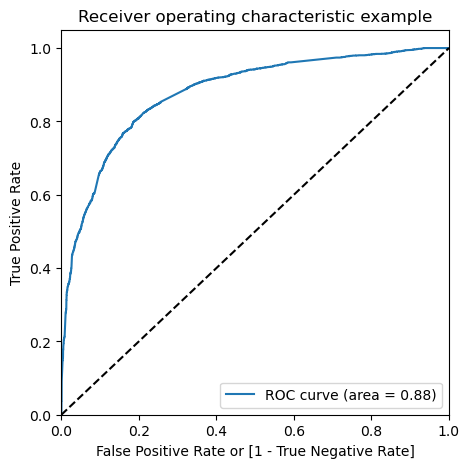

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

#### Finding optimal cutoff point

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.885255,9196,1,1,1,1,1,1,1,1,1,1,0
1,0,0.494726,4696,0,1,1,1,1,1,0,0,0,0,0
2,0,0.335695,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.098647,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.587433,1667,1,1,1,1,1,1,1,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.542046  0.975262  0.275889
0.2   0.2  0.740705  0.908595  0.637558
0.3   0.3  0.798309  0.831027  0.778207
0.4   0.4  0.812829  0.755556  0.848016
0.5   0.5  0.812670  0.688050  0.889232
0.6   0.6  0.793522  0.576520  0.926842
0.7   0.7  0.781235  0.506499  0.950026
0.8   0.8  0.763045  0.420964  0.973210
0.9   0.9  0.721557  0.288470  0.987635


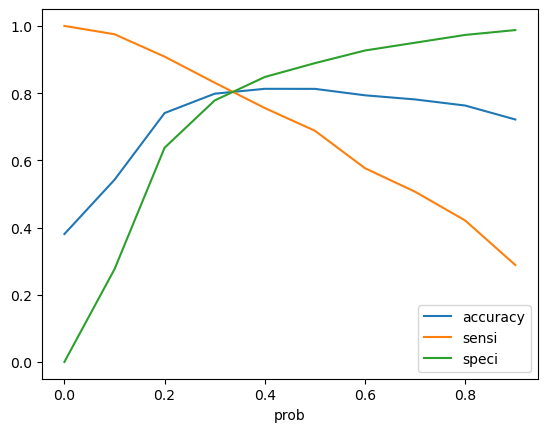

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [145]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.885255,9196,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.494726,4696,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.335695,3274,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.098647,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.587433,1667,1,1,1,1,1,1,1,0,0,0,0,1


In [146]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.885255,9196,1,89
1,0,0.494726,4696,1,49
2,0,0.335695,3274,0,34
3,0,0.098647,2164,0,10
4,1,0.587433,1667,1,59


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8123504068932503

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3269,  613],
       [ 563, 1822]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7639412997903564

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.842091705306543

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is very good.
We have the following values for the Train Data:

Accuracy : 81.23%
Sensitivity : 76.39%
Specificity : 84.20%

Some of the other Stats are derived below,
indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.157908294693457


In [153]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7482546201232033


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8530793319415448


In [155]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3269,  613],
       [ 563, 1822]], dtype=int64)

In [156]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7482546201232033

In [157]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7639412997903564

In [158]:
from sklearn.metrics import precision_score, recall_score

In [159]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7482546201232033

In [160]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7639412997903564

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

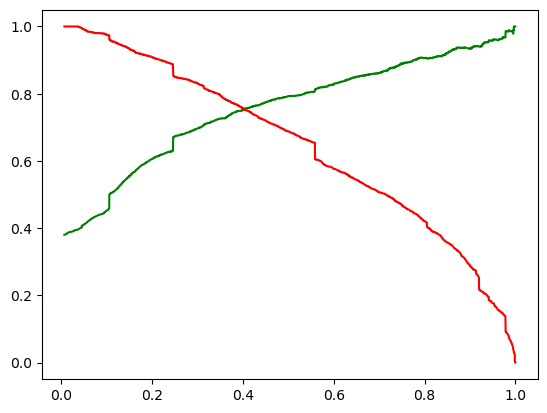

In [163]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Scaling the test data

In [164]:
num_cols = X_test.select_dtypes(include=["float64", "int64"]).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [165]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,"Specialization_Banking, Investment And Insurance"
7681,-0.311318,1,0,0,0,0,1,0,0,0,0
984,-0.550262,1,0,0,0,0,1,0,1,0,0
8135,0.812462,1,0,0,1,0,1,0,0,0,0
6915,-0.628665,1,0,0,0,0,0,0,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0


### Prediction on test test

In [166]:
X_test_sm = sm.add_constant(X_test)

In [167]:
y_test_pred = res.predict(X_test_sm)

In [168]:
y_test_pred[:10]

7681    0.420569
984     0.167844
8135    0.370595
6915    0.116690
2712    0.184623
244     0.352074
4698    0.098485
8287    0.103161
6791    0.425495
8970    0.086170
dtype: float64

In [169]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.4205685 , 0.16784367, 0.37059547, 0.11668994, 0.18462293,
       0.35207392, 0.09848457, 0.10316056, 0.42549486, 0.08617012])

In [170]:
y_test_pred_final = pd.DataFrame({"Converted": y_test.values, "Converted_prob": y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.420569,7681
1,0,0.167844,984
2,0,0.370595,8135
3,0,0.116690,6915
4,1,0.184623,2712


In [171]:
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID,Lead_Score
0,0,0.420569,7681,42
1,0,0.167844,984,17
2,0,0.370595,8135,37
3,0,0.116690,6915,12
4,1,0.184623,2712,18


In [172]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.39 else 0)
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,final_Predicted
0,0,0.420569,7681,42,1
1,0,0.167844,984,17,0
2,0,0.370595,8135,37,0
3,0,0.116690,6915,12,0
4,1,0.184623,2712,18,0


In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.8097542814594192

In [174]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_Predicted )
confusion2

array([[1398,  278],
       [ 233,  777]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7693069306930693

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.834128878281623

In [178]:
precision_score(y_test_pred_final.Converted , y_test_pred_final.final_Predicted)

0.7364928909952607

In [179]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.7693069306930693

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 80.97%
Sensitivity : 76.93%
Specificity : 83.41%

Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 81.23%
Sensitivity : 76.39%
Specificity : 84.20%

Test Data: 
Accuracy : 80.97%
Sensitivity : 76.93%
Specificity : 83.41%